# Project: Writing a Data Scientist Blog Post Following CRISP-DM Process

![](images/rabbit_not_rodent.png) 


#### Questions: 

1. Is there a relationship between rabbit breed, sex, and disorders?
2. Is there a relationship between unneutered-related disorders?
3. What are the most common disorders occurring in rabbits?
4. Which common disorder(s) are related to an improper diet/overconsumption? 


 ### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Rabbit_Data_00.csv',index_col=[0])
data.head()

,Mean_Wgt_over_6 mts_kg,VenomSex,Neutered,Rabbit_Breed,AgeAtDeath_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,NaN,Female,Neutered,Breed_Not_recorded,4.46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112,NaN,Female,Entire,Breed_Not_recorded,4.45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
181,1.86,Female,Unknown,Crossbreed specified,10.74,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1.86,Female,Unknown,Rex,2.04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data.shape

(370, 102)

In [4]:
# check labels for each column
data.columns.values

array(['Mean_Wgt_over_6 mts_kg', 'VenomSex', 'Neutered', 'Rabbit_Breed',
       'AgeAtDeath_years', 'Abscess - eyelid', 'Abscess - limb',
       'Abscess - mouth', 'Abscess - retrobulbar', 'Accidental injury',
       'Adverse reaction to drug', 'Anorexia', 'Arthritis', 'Ataxia',
       'Behaviour abnormal', 'Behavioural - lethargy',
       'Behavioural - overgrooming', 'Behavioural - unusual toileting',
       'Bite injury', 'Cataract', 'Chalazion (meibomian cyst)',
       'Chronic kidney disease', 'Claw/nail injury',
       'Claw/nails overlong', 'Conjunctivitis', 'Corneal ulcer',
       'Dental disease', 'Dental disease - malocclusion', 'Dental injury',
       'Diarrhoea', 'Dyspnoea', 'Epiphora/tear staining', 'Eye proptosed',
       'Faecal appearance abnormal', 'Fetal death/abortion',
       'Gastrointestinal obstruction', 'Haircoat disorder - dry skin',
       'Haircoat disorder - matted fur', 'Head tilt', 'Hepatomegaly',
       'Hermaphroditism', 'Hypothermia', 'Ileus',
       'I

In [5]:
data.info

<bound method DataFrame.info of             Mean_Wgt_over_6 mts_kg VenomSex  Neutered  \
Patient ID                                              
88                             NaN   Female  Neutered   
112                            NaN   Female    Entire   
136                           1.73   Female  Neutered   
181                           1.86   Female   Unknown   
235                           1.86   Female   Unknown   
...                            ...      ...       ...   
343                            NaN     Male   Unknown   
349                           2.20     Male   Unknown   
358                            NaN     Male   Unknown   
360                            NaN     Male   Unknown   
361                           2.20   Female   Unknown   

                                   Rabbit_Breed  AgeAtDeath_years  \
Patient ID                                                          
88                           Breed_Not_recorded              4.46   
112                

In [6]:
pd.value_counts(data.dtypes)

int64      97
object      3
float64     2
dtype: int64

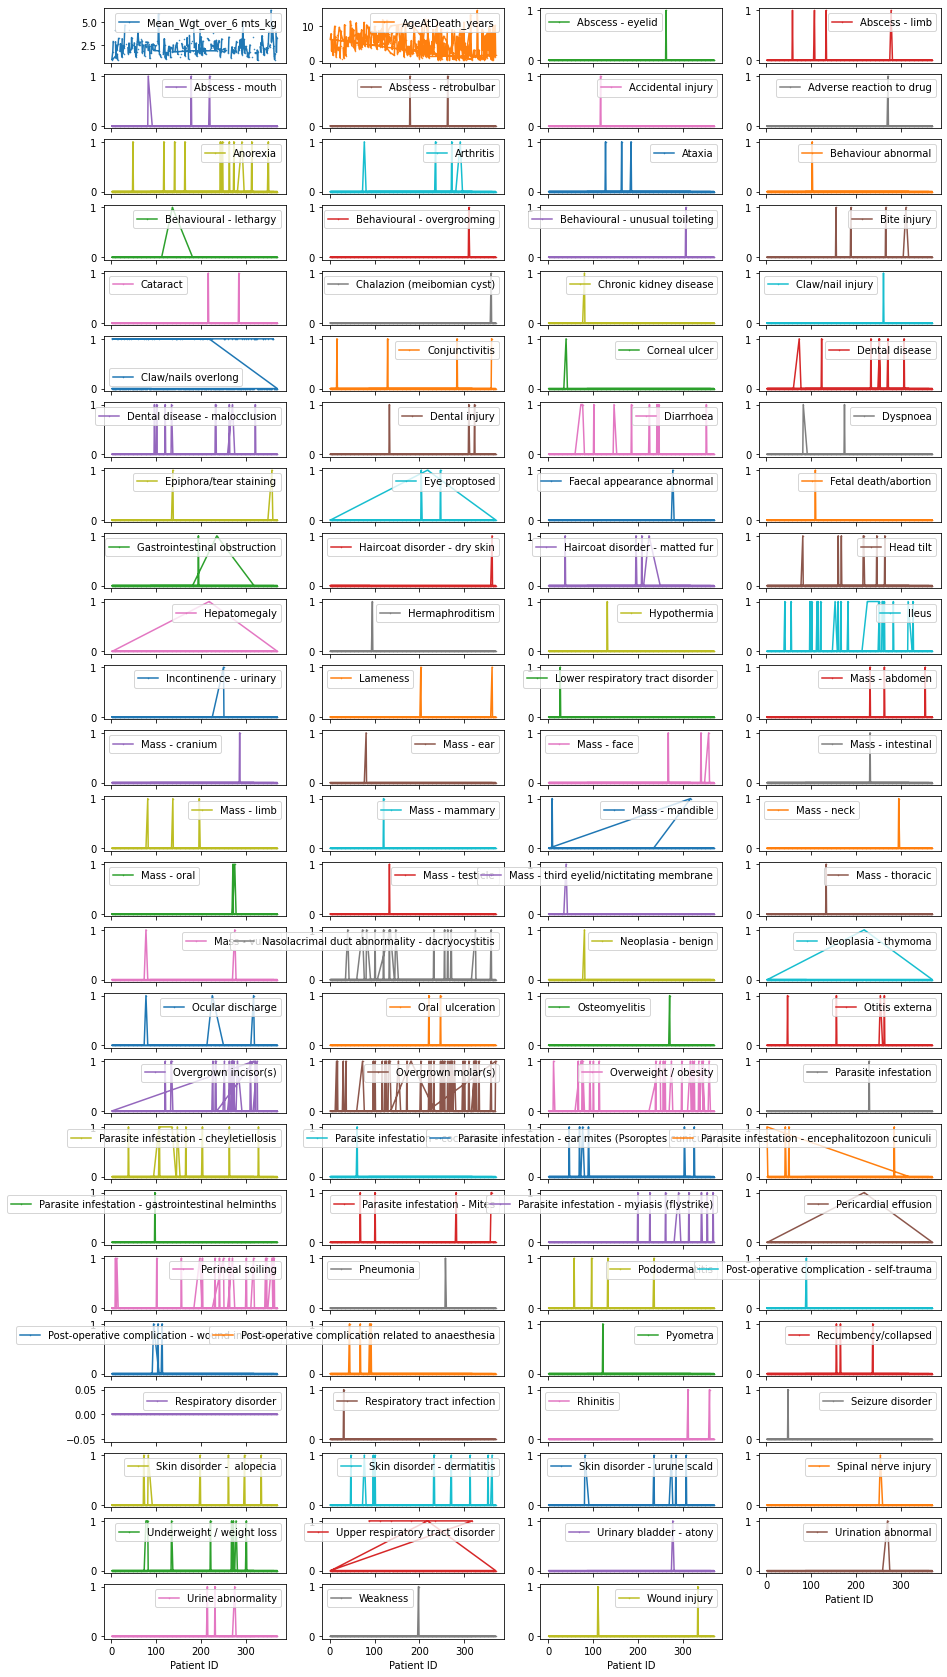

In [7]:
#Overview of the dataset
data.plot(marker='.', subplots=True,layout=(-1,4),figsize=(15,30),markersize=1);

## Perform exploratory data analysis (EDA):

### Summary Statistics

In [8]:
data.describe()
#The mean value is more than the median value of each column (50% percentile) 
#indicating there are extreme values/outliers in the dataset. The distribution is positively skewed. 

,Mean_Wgt_over_6 mts_kg,AgeAtDeath_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,Adverse reaction to drug,Anorexia,Arthritis,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
count,253.000000,360.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,...,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,2.245771,4.751028,0.002703,0.010811,0.008108,0.005405,0.002703,0.002703,0.032432,0.010811,...,0.027027,0.013514,0.002703,0.021622,0.018919,0.002703,0.002703,0.008108,0.002703,0.005405
std,0.844554,3.067435,0.051988,0.103552,0.089801,0.073422,0.051988,0.051988,0.177385,0.103552,...,0.162382,0.115616,0.051988,0.145642,0.136423,0.051988,0.051988,0.089801,0.051988,0.073422
min,0.830000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.670000,2.085000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.140000,4.335000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.620000,6.992500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.250000,14.420000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#select columns in index range 0 to 102
data = data.iloc[:, 0:102]
data

,Mean_Wgt_over_6 mts_kg,VenomSex,Neutered,Rabbit_Breed,AgeAtDeath_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,NaN,Female,Neutered,Breed_Not_recorded,4.46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112,NaN,Female,Entire,Breed_Not_recorded,4.45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
181,1.86,Female,Unknown,Crossbreed specified,10.74,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1.86,Female,Unknown,Rex,2.04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,NaN,Male,Unknown,Dutch,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,2.20,Male,Unknown,Miniature Lop (Holland LopÂ in USA),7.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,NaN,Male,Unknown,Chinchilla,9.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Patient ID'>

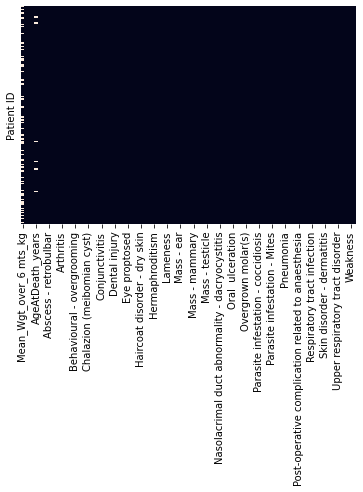

In [10]:
# checking for missing values with the help of visualisation
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [11]:
# calculate attributes correlation
data.corr()

,Mean_Wgt_over_6 mts_kg,AgeAtDeath_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,Adverse reaction to drug,Anorexia,Arthritis,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Mean_Wgt_over_6 mts_kg,1.000000,-0.034695,NaN,-0.021544,-0.022105,NaN,0.016011,-0.043778,-0.094645,0.004019,...,-0.018784,-0.035338,-0.004915,-0.006873,-0.055768,-0.037799,NaN,0.026976,0.143810,0.039179
AgeAtDeath_years,-0.034695,1.000000,NaN,0.073586,0.096831,-0.011045,-0.015697,-0.012940,0.015168,0.096684,...,-0.007617,0.052884,0.038749,-0.002511,-0.000113,0.064767,-0.046194,-0.059884,0.015145,-0.031624
Abscess - eyelid,NaN,NaN,1.000000,-0.005442,-0.004707,0.706148,-0.002710,-0.002710,0.284340,-0.005442,...,-0.008676,-0.006093,-0.002710,-0.007739,-0.007229,-0.002710,-0.002710,-0.004707,-0.002710,-0.003838
Abscess - limb,-0.021544,0.073586,-0.005442,1.000000,-0.009452,-0.007707,-0.005442,-0.005442,-0.019140,-0.010929,...,-0.017424,-0.012236,-0.005442,0.164152,-0.014517,0.497963,-0.005442,-0.009452,-0.005442,-0.007707
Abscess - mouth,-0.022105,0.096831,-0.004707,-0.009452,1.000000,-0.006665,-0.004707,-0.004707,-0.016553,-0.009452,...,-0.015069,0.250440,-0.004707,-0.013441,-0.012555,-0.004707,-0.004707,-0.008174,-0.004707,-0.006665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urinary bladder - atony,-0.037799,0.064767,-0.002710,0.497963,-0.004707,-0.003838,-0.002710,-0.002710,-0.009531,-0.005442,...,-0.008676,-0.006093,-0.002710,0.350184,-0.007229,1.000000,-0.002710,-0.004707,-0.002710,-0.003838
Urination abnormal,NaN,-0.046194,-0.002710,-0.005442,-0.004707,-0.003838,-0.002710,-0.002710,-0.009531,-0.005442,...,-0.008676,-0.006093,-0.002710,-0.007739,-0.007229,-0.002710,1.000000,-0.004707,-0.002710,-0.003838
Urine abnormality,0.026976,-0.059884,-0.004707,-0.009452,-0.008174,-0.006665,-0.004707,-0.004707,-0.016553,-0.009452,...,-0.015069,0.250440,-0.004707,-0.013441,-0.012555,-0.004707,-0.004707,1.000000,-0.004707,-0.006665
Weakness,0.143810,0.015145,-0.002710,-0.005442,-0.004707,-0.003838,-0.002710,-0.002710,-0.009531,-0.005442,...,-0.008676,-0.006093,-0.002710,-0.007739,-0.007229,-0.002710,-0.002710,-0.004707,1.000000,-0.003838


<AxesSubplot:>

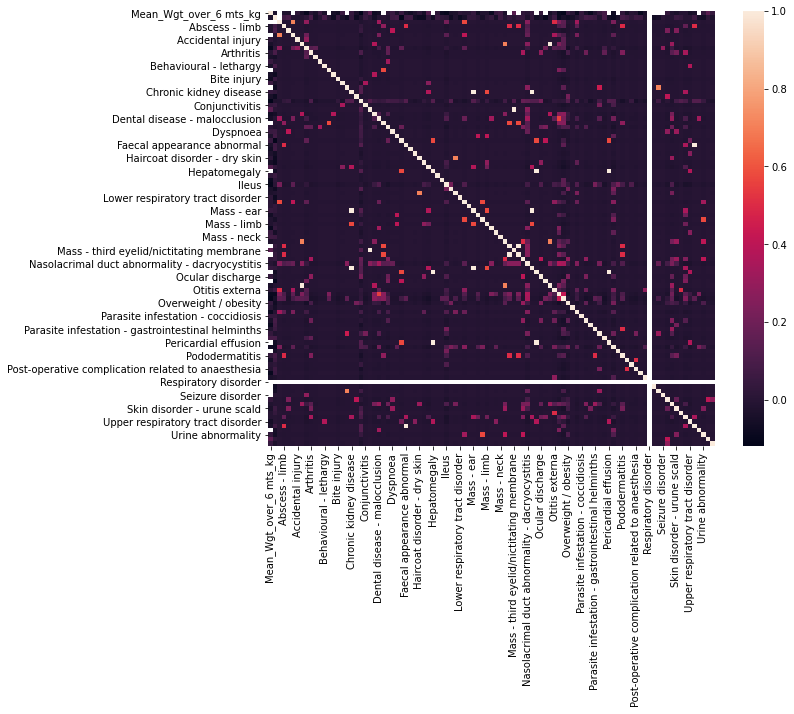

In [12]:
# Build correlation heatmap: 
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False) 
#light shades represents positive correlation while darker shades represents negative correlation.

 ### Data Cleaning and Preparation

In [13]:
# Rename columns appropriately 
data.rename(columns = {"Mean_Wgt_over_6 mts_kg": "Weight_kg"}, inplace = True)
data.rename(columns = {"VenomSex": "Sex"}, inplace = True)
data.rename(columns = {"AgeAtDeath_years": "PassingAge_years"}, inplace = True)

In [14]:
data.head()

,Weight_kg,Sex,Neutered,Rabbit_Breed,PassingAge_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,NaN,Female,Neutered,Breed_Not_recorded,4.46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112,NaN,Female,Entire,Breed_Not_recorded,4.45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
181,1.86,Female,Unknown,Crossbreed specified,10.74,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1.86,Female,Unknown,Rex,2.04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#value count of each column in the data 
data.apply(lambda x: x.value_counts()).T.stack()

Weight_kg          0.83      1.0
                   0.88      1.0
                   0.89      1.0
                   0.90      1.0
                   0.94      1.0
                           ...  
Urine abnormality  1.00      3.0
Weakness           0.00    369.0
                   1.00      1.0
Wound injury       0.00    368.0
                   1.00      2.0
Length: 657, dtype: float64

In [16]:
data.dtypes

Weight_kg                  float64
Sex                         object
Neutered                    object
Rabbit_Breed                object
PassingAge_years           float64
                            ...   
Urinary bladder - atony      int64
Urination abnormal           int64
Urine abnormality            int64
Weakness                     int64
Wound injury                 int64
Length: 102, dtype: object

In [17]:
data['Neutered'].unique()

array(['Neutered', 'Entire', 'Unknown'], dtype=object)

#### Missing Data

In [18]:
data.isnull().sum()

Weight_kg                  117
Sex                          0
Neutered                     0
Rabbit_Breed                 0
PassingAge_years            10
                          ... 
Urinary bladder - atony      0
Urination abnormal           0
Urine abnormality            0
Weakness                     0
Wound injury                 0
Length: 102, dtype: int64

In [19]:
# With numerical data like the ‘weight_kg’ and 'AgeAtDeath_years' 
#Taking the *mean* can help us even the dataset out. So NaN won't throwing off the analysis.

data.Weight_kg = data.Weight_kg.fillna(data.Weight_kg.mean())
data.PassingAge_years = data.PassingAge_years.fillna(data.PassingAge_years.mean())
pd.options.display.float_format = "{:,.2f}".format
data

,Weight_kg,Sex,Neutered,Rabbit_Breed,PassingAge_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,2.25,Female,Neutered,Breed_Not_recorded,4.46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112,2.25,Female,Entire,Breed_Not_recorded,4.45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
181,1.86,Female,Unknown,Crossbreed specified,10.74,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1.86,Female,Unknown,Rex,2.04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2.25,Male,Unknown,Dutch,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,2.20,Male,Unknown,Miniature Lop (Holland LopÂ in USA),7.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,2.25,Male,Unknown,Chinchilla,9.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Patient ID'>

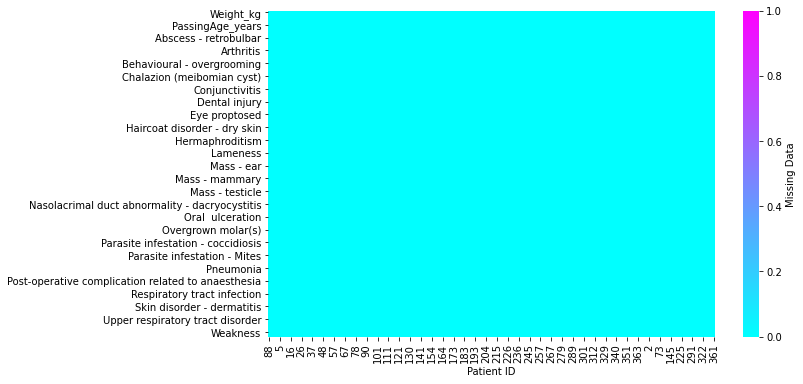

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="cool",
            vmin=0,
            vmax=1,
            cbar_kws={'label': 'Missing Data'})

In [21]:
data.dtypes

Weight_kg                  float64
Sex                         object
Neutered                    object
Rabbit_Breed                object
PassingAge_years           float64
                            ...   
Urinary bladder - atony      int64
Urination abnormal           int64
Urine abnormality            int64
Weakness                     int64
Wound injury                 int64
Length: 102, dtype: object

## 1. Is there a relationship between rabbit breed, sex and disorders?

In [22]:
'''Select the disorder column names, groupby the Breeds and sum the values in the disorder columns 
to identify the count of particular disorders per breeed. 
After this the data can be plot'''

'Select the disorder column names, groupby the Breeds and sum the values in the disorder columns \nto identify the count of particular disorders per breeed. \nAfter this the data can be plot'

### Sum of disorders & group by the sex of the rabbit

In [23]:
data.groupby(data.columns[1])[data.columns[5:102]].sum()

,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,Adverse reaction to drug,Anorexia,Arthritis,Ataxia,Behaviour abnormal,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Sex,,,,,,,,,,,,,,,,,,,,,
Female,1,2,0,1,0,0,3,1,2,0,...,5,3,0,4,6,1,0,2,1,1
Male,0,2,3,1,1,1,8,3,1,1,...,5,2,1,4,1,0,1,1,0,1
Unknown,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sum of disorders & group by rabbit breed

In [24]:
data.groupby(data.columns[3])[data.columns[5:102]].sum()

,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,Adverse reaction to drug,Anorexia,Arthritis,Ataxia,Behaviour abnormal,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Rabbit_Breed,,,,,,,,,,,,,,,,,,,,,
American Fuzzy Lop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgian Hare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blanc de Bouscat,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Breed_Not_recorded,0,2,0,0,0,0,2,1,0,0,...,3,0,0,1,2,0,0,0,0,1
Britannia Petite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
British Giant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Californian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cashmere Lop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chinchilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cols = data.columns[5:] # disorders columns
df_long = data.melt(['Rabbit_Breed'], value_vars=cols, var_name='Disorder') # Convert the dataframe to long format
df_long

,Rabbit_Breed,Disorder,value
0,Breed_Not_recorded,Abscess - eyelid,0
1,Breed_Not_recorded,Abscess - eyelid,0
2,Dwarf LopÂ (Mini Lop in USA),Abscess - eyelid,0
3,Crossbreed specified,Abscess - eyelid,0
4,Rex,Abscess - eyelid,0
...,...,...,...
35885,Dutch,Wound injury,0
35886,Miniature Lop (Holland LopÂ in USA),Wound injury,0
35887,Chinchilla,Wound injury,0
35888,Breed_Not_recorded,Wound injury,0


In [26]:
counts = df_long.groupby(['Rabbit_Breed', 'Disorder']).sum() # disease counts per breed
counts

value
Rabbit_Breed       Disorder                      
American Fuzzy Lop Abscess - eyelid             0
                   Abscess - limb               0
                   Abscess - mouth              0
                   Abscess - retrobulbar        0
                   Accidental injury            0
...                                           ...
Rex (Standard)     Urinary bladder - atony      0
                   Urination abnormal           0
                   Urine abnormality            0
                   Weakness                     0
                   Wound injury                 0

[2716 rows x 1 columns]

In [27]:
top5 = counts.groupby('Rabbit_Breed', group_keys=False)['value'].nlargest(5).reset_index() # top5 diseases per breed
top5

,Rabbit_Breed,Disorder,value
0,American Fuzzy Lop,Recumbency/collapsed,1
1,American Fuzzy Lop,Abscess - eyelid,0
2,American Fuzzy Lop,Abscess - limb,0
3,American Fuzzy Lop,Abscess - mouth,0
4,American Fuzzy Lop,Abscess - retrobulbar,0
...,...,...,...
135,Rex (Standard),Abscess - eyelid,0
136,Rex (Standard),Abscess - limb,0
137,Rex (Standard),Abscess - mouth,0
138,Rex (Standard),Abscess - retrobulbar,0


In [28]:
pip install colorcet

Note: you may need to restart the kernel to use updated packages.


In [29]:
import colorcet as cc

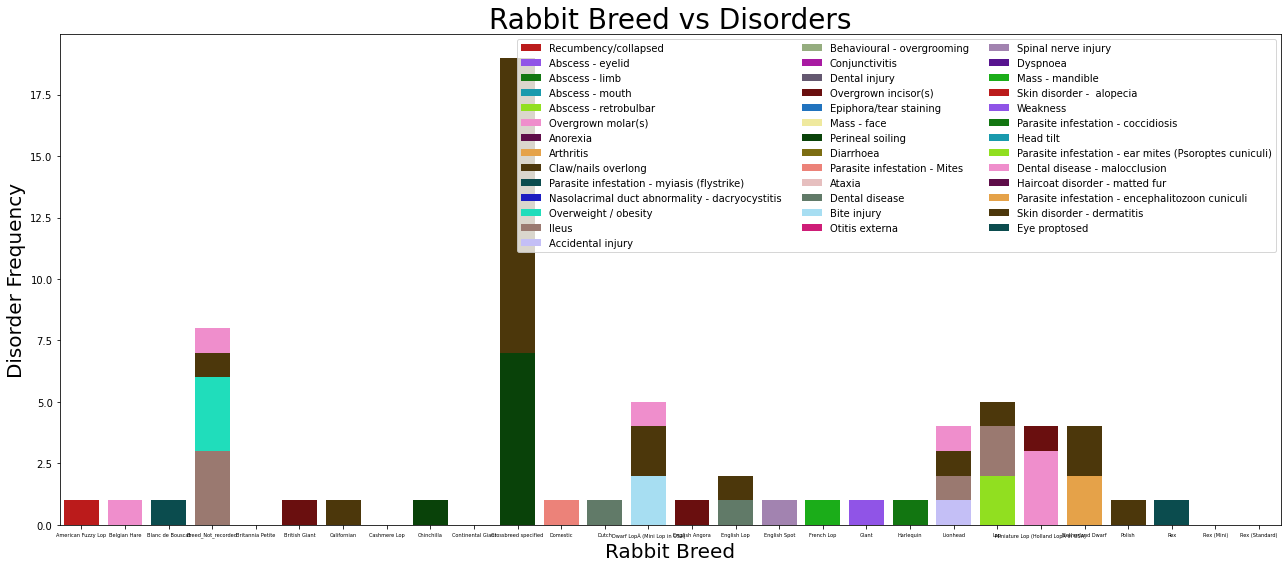

In [30]:
plt.figure(figsize=(18,8))
sns.barplot(data=top5, x='Rabbit_Breed', y='value', hue='Disorder', dodge=False, palette = sns.color_palette(cc.glasbey, n_colors=30));
plt.xlabel('Rabbit Breed', fontsize=20)
plt.ylabel('Disorder Frequency', fontsize=20)
plt.title("Rabbit Breed vs Disorders", fontsize=28)
plt.xticks(fontsize=5)
plt.legend(ncol=3, loc=1)
plt.tight_layout()

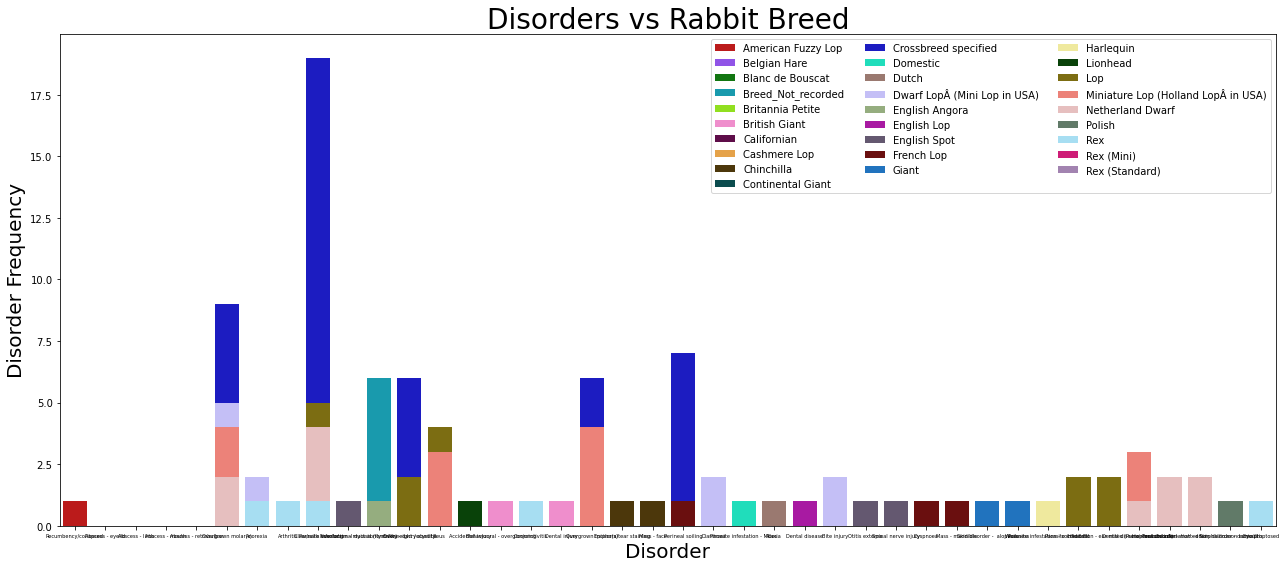

In [31]:
plt.figure(figsize=(18,8))
sns.barplot(data=top5, x='Disorder', y='value', hue='Rabbit_Breed', dodge=False,palette = sns.color_palette(cc.glasbey, n_colors=30));
plt.xlabel('Disorder', fontsize=20)
plt.ylabel('Disorder Frequency', fontsize=20)
plt.title("Disorders vs Rabbit Breed", fontsize=28)
plt.xticks(fontsize=5)
plt.legend(ncol=3, loc=1)
plt.tight_layout()

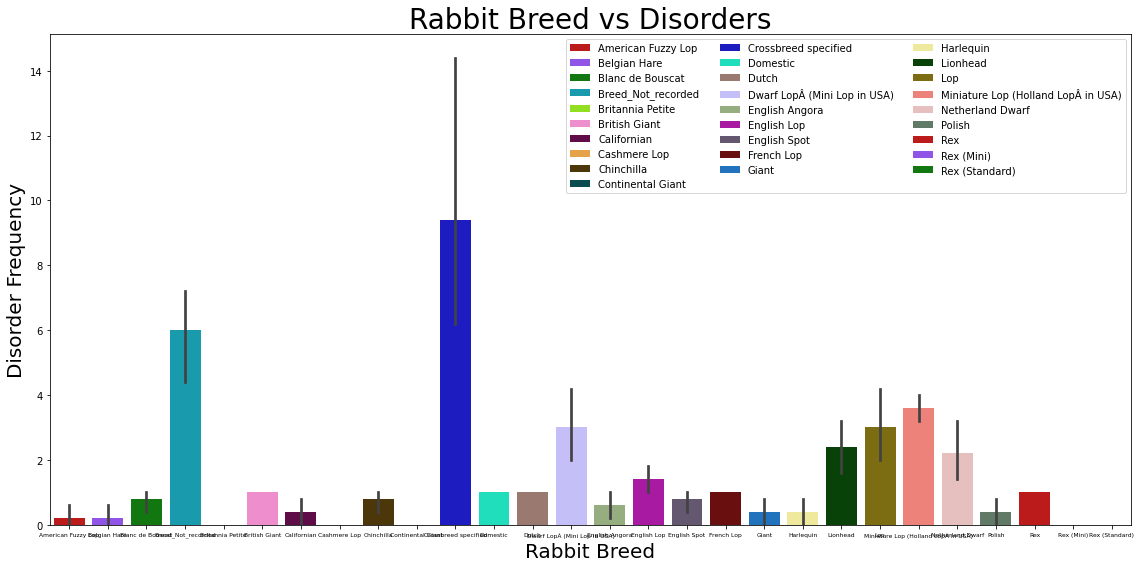

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(data=top5, x='Rabbit_Breed', y='value', hue='Rabbit_Breed', dodge=False,palette = sns.color_palette(cc.glasbey, n_colors=25));
plt.xlabel('Rabbit Breed', fontsize=20)
plt.ylabel('Disorder Frequency', fontsize=20)
plt.title("Rabbit Breed vs Disorders", fontsize=28)
plt.xticks(fontsize=6)
plt.legend(ncol=3, loc=1)
plt.tight_layout()

In [33]:
data[['Sex','Weight_kg']].sample(n=5)

,Sex,Weight_kg
Patient ID,,
93,Female,2.60
32,Female,2.60
292,Female,1.45
166,Male,2.18
358,Male,2.25


In [34]:
disorder_cols=data.columns[5:102]

In [35]:
df_1 = data.melt(['Sex'], value_vars=cols, var_name='Disorder') # Convert the dataframe to long format
df_1

,Sex,Disorder,value
0,Female,Abscess - eyelid,0
1,Female,Abscess - eyelid,0
2,Female,Abscess - eyelid,0
3,Female,Abscess - eyelid,0
4,Female,Abscess - eyelid,0
...,...,...,...
35885,Male,Wound injury,0
35886,Male,Wound injury,0
35887,Male,Wound injury,0
35888,Male,Wound injury,0


In [36]:
sums = df_1.groupby(['Sex', 'Disorder']).sum() # disease counts per sex
sums

value
Sex     Disorder                      
Female  Abscess - eyelid             1
        Abscess - limb               2
        Abscess - mouth              0
        Abscess - retrobulbar        1
        Accidental injury            0
...                                ...
Unknown Urinary bladder - atony      0
        Urination abnormal           0
        Urine abnormality            0
        Weakness                     0
        Wound injury                 0

[291 rows x 1 columns]

In [37]:
top5s = sums.groupby('Sex', group_keys=False)['value'].nlargest(5).reset_index() # top5 diseases per sex

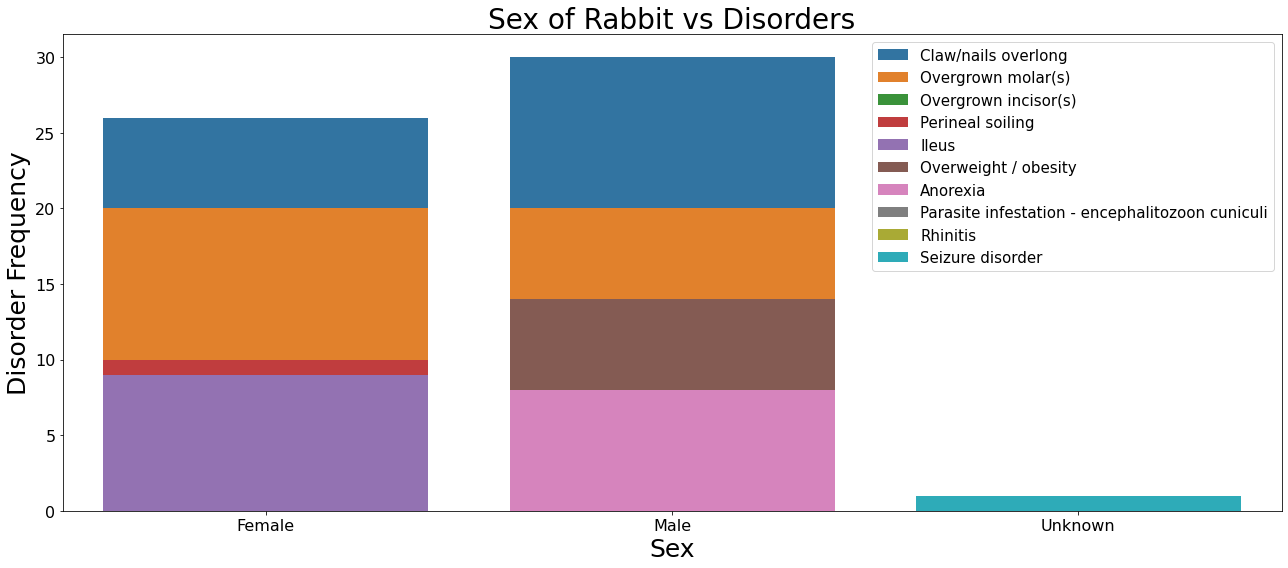

In [38]:
plt.figure(figsize=(18,8))
sns.barplot(data=top5s, x='Sex', y='value', hue='Disorder', dodge=False);
plt.xlabel('Sex', fontsize=25)
plt.ylabel('Disorder Frequency', fontsize=25)
plt.title("Sex of Rabbit vs Disorders", fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=1, loc=1, fontsize=15)
plt.tight_layout()

## 2. Is there a relationship between unneutred-related disorders?

In [39]:
df_ = data.melt(['Neutered'], value_vars=cols, var_name='Disorder') # Convert the dataframe to long format
df_

,Neutered,Disorder,value
0,Neutered,Abscess - eyelid,0
1,Entire,Abscess - eyelid,0
2,Neutered,Abscess - eyelid,0
3,Unknown,Abscess - eyelid,0
4,Unknown,Abscess - eyelid,0
...,...,...,...
35885,Unknown,Wound injury,0
35886,Unknown,Wound injury,0
35887,Unknown,Wound injury,0
35888,Unknown,Wound injury,0


In [40]:
n_sum = df_.groupby(['Neutered', 'Disorder']).sum() # disease counts per neutering
n_sum

value
Neutered Disorder                      
Entire   Abscess - eyelid             0
         Abscess - limb               1
         Abscess - mouth              1
         Abscess - retrobulbar        1
         Accidental injury            0
...                                 ...
Unknown  Urinary bladder - atony      1
         Urination abnormal           1
         Urine abnormality            1
         Weakness                     0
         Wound injury                 1

[291 rows x 1 columns]

In [41]:
most5 = n_sum.groupby('Neutered', group_keys=False)['value'].nlargest(5).reset_index() # top5 diseases per neutering
most5

,Neutered,Disorder,value
0,Entire,Claw/nails overlong,13
1,Entire,Overgrown molar(s),7
2,Entire,Ileus,3
3,Entire,Overgrown incisor(s),3
4,Entire,Anorexia,2
5,Neutered,Overgrown molar(s),11
6,Neutered,Claw/nails overlong,10
7,Neutered,Ileus,7
8,Neutered,Overweight / obesity,7
9,Neutered,Anorexia,5


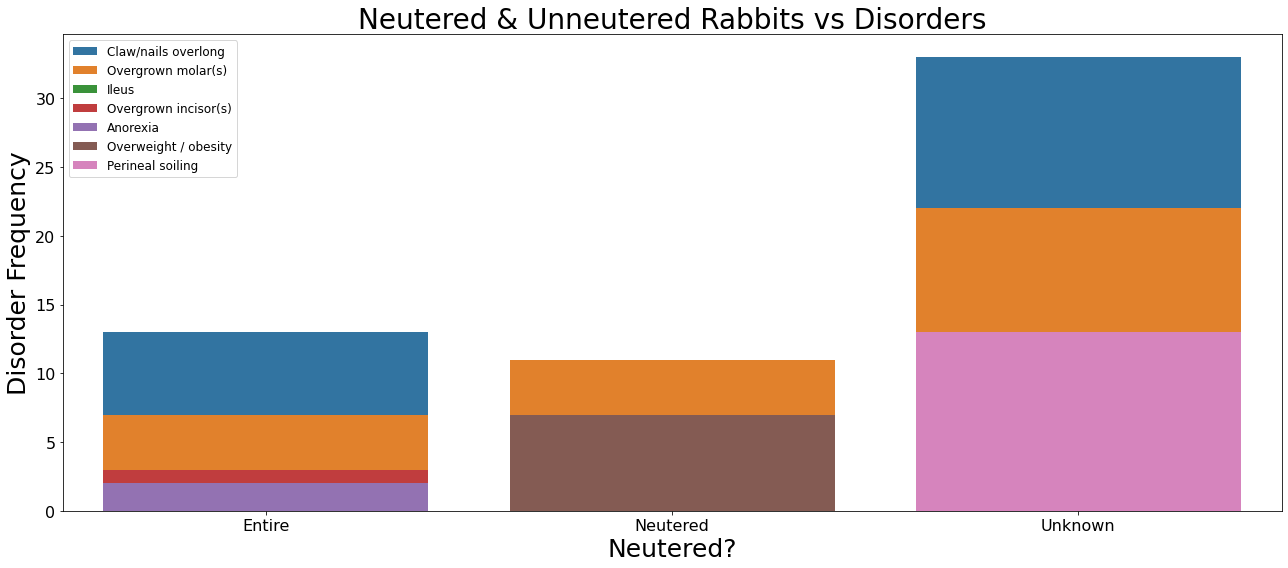

In [42]:
plt.figure(figsize=(18,8))
sns.barplot(data=most5, x='Neutered', y='value', hue='Disorder', dodge=False);
plt.xlabel('Neutered?', fontsize=25)
plt.ylabel('Disorder Frequency', fontsize=25)
plt.title("Neutered & Unneutered Rabbits vs Disorders", fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=1, loc=2, fontsize=12)
plt.tight_layout()

In [43]:
data.to_csv("Cleaned_Rabbit_Dataset.csv")

In [44]:
new_df = pd.read_csv('Cleaned_Rabbit_Dataset.csv',index_col=[0])
new_df

,Weight_kg,Sex,Neutered,Rabbit_Breed,PassingAge_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,2.25,Female,Neutered,Breed_Not_recorded,4.46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
112,2.25,Female,Entire,Breed_Not_recorded,4.45,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
181,1.86,Female,Unknown,Crossbreed specified,10.74,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1.86,Female,Unknown,Rex,2.04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2.25,Male,Unknown,Dutch,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,2.20,Male,Unknown,Miniature Lop (Holland LopÂ in USA),7.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,2.25,Male,Unknown,Chinchilla,9.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Append a column of row sums to the df
df = new_df.append(new_df.sum(numeric_only=True).rename('Total'))
df

,Weight_kg,Sex,Neutered,Rabbit_Breed,PassingAge_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,2.25,Female,Neutered,Breed_Not_recorded,4.46,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
112,2.25,Female,Entire,Breed_Not_recorded,4.45,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
181,1.86,Female,Unknown,Crossbreed specified,10.74,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
235,1.86,Female,Unknown,Rex,2.04,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2.20,Male,Unknown,Miniature Lop (Holland LopÂ in USA),7.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
358,2.25,Male,Unknown,Chinchilla,9.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
360,2.25,Male,Unknown,Breed_Not_recorded,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [46]:
#This replaces the NaN entries in the ‘Sex’, 'Neutered' and 'Rabbit Breed' columns with the empty string, 
# but we can replace it with a default name such as “Not known” or "Other".

df.Sex = df.Sex.fillna('')
df.Neutered = df.Neutered.fillna('')
df.Rabbit_Breed = df.Rabbit_Breed.fillna('')

df

,Weight_kg,Sex,Neutered,Rabbit_Breed,PassingAge_years,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,2.25,Female,Neutered,Breed_Not_recorded,4.46,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
112,2.25,Female,Entire,Breed_Not_recorded,4.45,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
136,1.73,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
181,1.86,Female,Unknown,Crossbreed specified,10.74,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
235,1.86,Female,Unknown,Rex,2.04,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2.20,Male,Unknown,Miniature Lop (Holland LopÂ in USA),7.41,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
358,2.25,Male,Unknown,Chinchilla,9.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
360,2.25,Male,Unknown,Breed_Not_recorded,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
df2 = df.drop(columns=['Weight_kg','PassingAge_years'])
df2

,Sex,Neutered,Rabbit_Breed,Abscess - eyelid,Abscess - limb,Abscess - mouth,Abscess - retrobulbar,Accidental injury,Adverse reaction to drug,Anorexia,...,Skin disorder - dermatitis,Skin disorder - urune scald,Spinal nerve injury,Underweight / weight loss,Upper respiratory tract disorder,Urinary bladder - atony,Urination abnormal,Urine abnormality,Weakness,Wound injury
Patient ID,,,,,,,,,,,,,,,,,,,,,
88,Female,Neutered,Breed_Not_recorded,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
112,Female,Entire,Breed_Not_recorded,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
136,Female,Neutered,Dwarf LopÂ (Mini Lop in USA),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
181,Female,Unknown,Crossbreed specified,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
235,Female,Unknown,Rex,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Male,Unknown,Miniature Lop (Holland LopÂ in USA),0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
358,Male,Unknown,Chinchilla,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
360,Male,Unknown,Breed_Not_recorded,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Text(0, 0.5, 'Disorders')

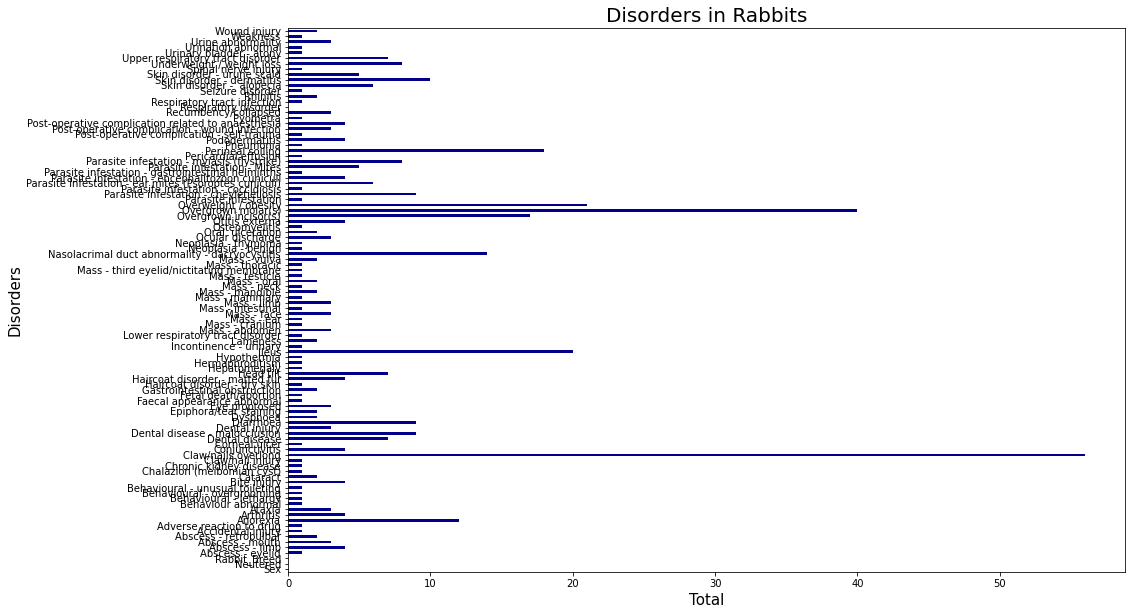

In [48]:
#Change the dtype to numeric and plot 'Total'
plt.figure(figsize=(15,10))
pd.to_numeric(df2.loc['Total'], errors='coerce').plot(kind='barh', color='darkblue')
# counts.sort_values(ascending=False).plot(kind='barh', color='darkblue')
# plt.xticks(rotation=25)

plt.title("Disorders in Rabbits", fontsize=20)
plt.xlabel("Total", fontsize=15)
plt.ylabel("Disorders", fontsize=15)

In [49]:
 (pd.to_numeric(df2.loc['Total'], errors='coerce')) 

Sex                        NaN
Neutered                   NaN
Rabbit_Breed               NaN
Abscess - eyelid          1.00
Abscess - limb            4.00
                          ... 
Urinary bladder - atony   1.00
Urination abnormal        1.00
Urine abnormality         3.00
Weakness                  1.00
Wound injury              2.00
Name: Total, Length: 100, dtype: float64

In [50]:
df2.max()

Sex                               Unknown
Neutered                          Unknown
Rabbit_Breed               Rex (Standard)
Abscess - eyelid                     1.00
Abscess - limb                       4.00
                                ...      
Urinary bladder - atony              1.00
Urination abnormal                   1.00
Urine abnormality                    3.00
Weakness                             1.00
Wound injury                         2.00
Length: 100, dtype: object

Keep top 20 most common illnesses


## 3. What are the most common illness occuring in rabbits

### Top 10 common disorders

In [51]:
#mixed datatypes in 'Total' row
top10 = df2.loc[:, pd.to_numeric(df2.loc['Total'], errors='coerce') >= 10]
top10

,Anorexia,Claw/nails overlong,Ileus,Nasolacrimal duct abnormality - dacryocystitis,Overgrown incisor(s),Overgrown molar(s),Overweight / obesity,Perineal soiling,Skin disorder - dermatitis
Patient ID,,,,,,,,,
88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
112,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
136,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
181,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
235,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
349,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
358,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
360,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


### Top 15 common disorders

In [52]:
top15 = df2.loc[:, pd.to_numeric(df2.loc['Total'], errors='coerce') >= 15]
top15

,Claw/nails overlong,Ileus,Overgrown incisor(s),Overgrown molar(s),Overweight / obesity,Perineal soiling
Patient ID,,,,,,
88,0.00,0.00,0.00,0.00,0.00,0.00
112,0.00,0.00,0.00,0.00,0.00,0.00
136,0.00,0.00,0.00,0.00,0.00,0.00
181,0.00,0.00,0.00,1.00,0.00,0.00
235,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
349,1.00,0.00,0.00,0.00,0.00,0.00
358,1.00,0.00,0.00,0.00,0.00,1.00
360,1.00,0.00,0.00,1.00,0.00,0.00


### Top 20 common disorders

In [53]:
top20 = df2.loc[:, pd.to_numeric(df2.loc['Total'], errors='coerce') >= 20]
top20

,Claw/nails overlong,Ileus,Overgrown molar(s),Overweight / obesity
Patient ID,,,,
88,0.00,0.00,0.00,0.00
112,0.00,0.00,0.00,0.00
136,0.00,0.00,0.00,0.00
181,0.00,0.00,1.00,0.00
235,0.00,0.00,0.00,0.00
...,...,...,...,...
349,1.00,0.00,0.00,0.00
358,1.00,0.00,0.00,0.00
360,1.00,0.00,1.00,0.00


<AxesSubplot:xlabel='Patient ID'>

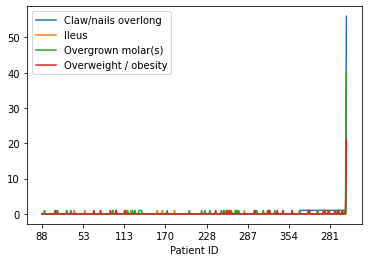

In [54]:
top20.plot()

In [55]:
df2 = pd.to_numeric(df2.loc['Total'],errors = 'coerce')
df2.dtypes

dtype('float64')

In [56]:
df2.to_csv('bunnies2.csv')

In [57]:
df_3 = pd.read_csv('bunnies2.csv')
df_3

,Unnamed: 0,Total
0,Sex,NaN
1,Neutered,NaN
2,Rabbit_Breed,NaN
3,Abscess - eyelid,1.00
4,Abscess - limb,4.00
...,...,...
95,Urinary bladder - atony,1.00
96,Urination abnormal,1.00
97,Urine abnormality,3.00
98,Weakness,1.00


## 4. Which common disorder(s) are related to improper diet/overconsumption?

In [58]:
df_3.head(100)

,Unnamed: 0,Total
0,Sex,NaN
1,Neutered,NaN
2,Rabbit_Breed,NaN
3,Abscess - eyelid,1.00
4,Abscess - limb,4.00
...,...,...
95,Urinary bladder - atony,1.00
96,Urination abnormal,1.00
97,Urine abnormality,3.00
98,Weakness,1.00


In [59]:
df_3.rename(columns = {'Unnamed: 0':'Disorders'},inplace = True)
df_3

,Disorders,Total
0,Sex,NaN
1,Neutered,NaN
2,Rabbit_Breed,NaN
3,Abscess - eyelid,1.00
4,Abscess - limb,4.00
...,...,...
95,Urinary bladder - atony,1.00
96,Urination abnormal,1.00
97,Urine abnormality,3.00
98,Weakness,1.00


In [60]:
Disorders = df_3['Disorders']
Total = df_3['Total']

Text(0, 0.5, 'Total')

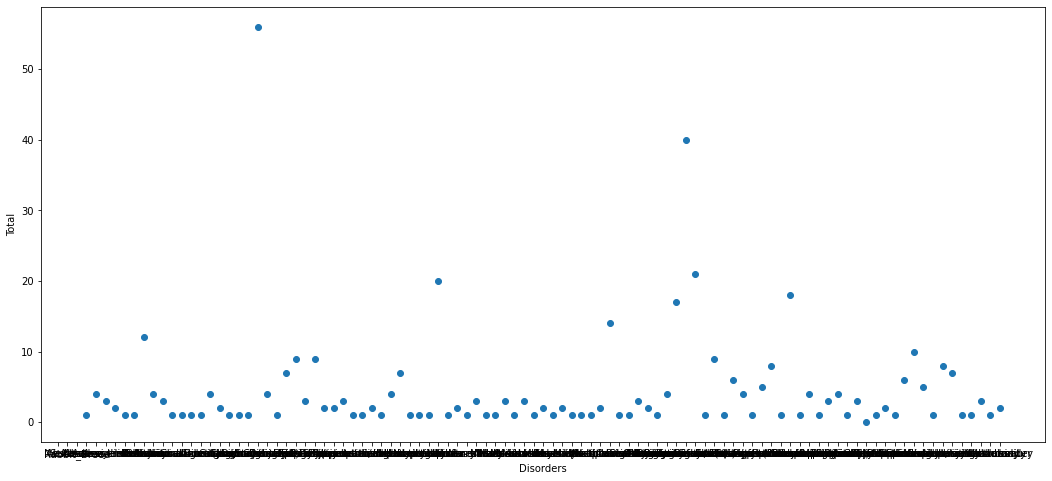

In [61]:
plt.figure(figsize=(18,8))
plt.scatter(Disorders, Total)
plt.xlabel("Disorders")
plt.ylabel("Total")
# plt.xticks(rotation=25)

In [62]:
# Find top common disorders 
common_top20 = df_3.groupby('Disorders')['Total'].sum().sort_values(ascending=False).head(20)
common_top20

Disorders
Claw/nails overlong                                     56.00
Overgrown molar(s)                                      40.00
Overweight / obesity                                    21.00
Ileus                                                   20.00
Perineal soiling                                        18.00
Overgrown incisor(s)                                    17.00
Nasolacrimal duct abnormality - dacryocystitis          14.00
Anorexia                                                12.00
Skin disorder - dermatitis                              10.00
Dental disease - malocclusion                            9.00
Diarrhoea                                                9.00
Parasite infestation - cheyletiellosis                   9.00
Parasite infestation - myiasis (flystrike)               8.00
Underweight / weight loss                                8.00
Head tilt                                                7.00
Upper respiratory tract disorder                         7.0

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, 'Claw/nails overlong'),
  Text(2.5, 0, ''),
  Text(5.0, 0, 'Overgrown incisor(s)'),
  Text(7.5, 0, ''),
  Text(10.0, 0, 'Diarrhoea'),
  Text(12.5, 0, ''),
  Text(15.0, 0, 'Upper respiratory tract disorder'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

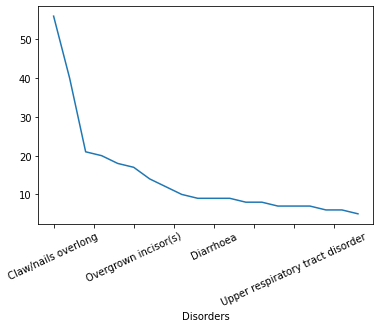

In [63]:
common_top20.plot()
plt.xticks(rotation=25)

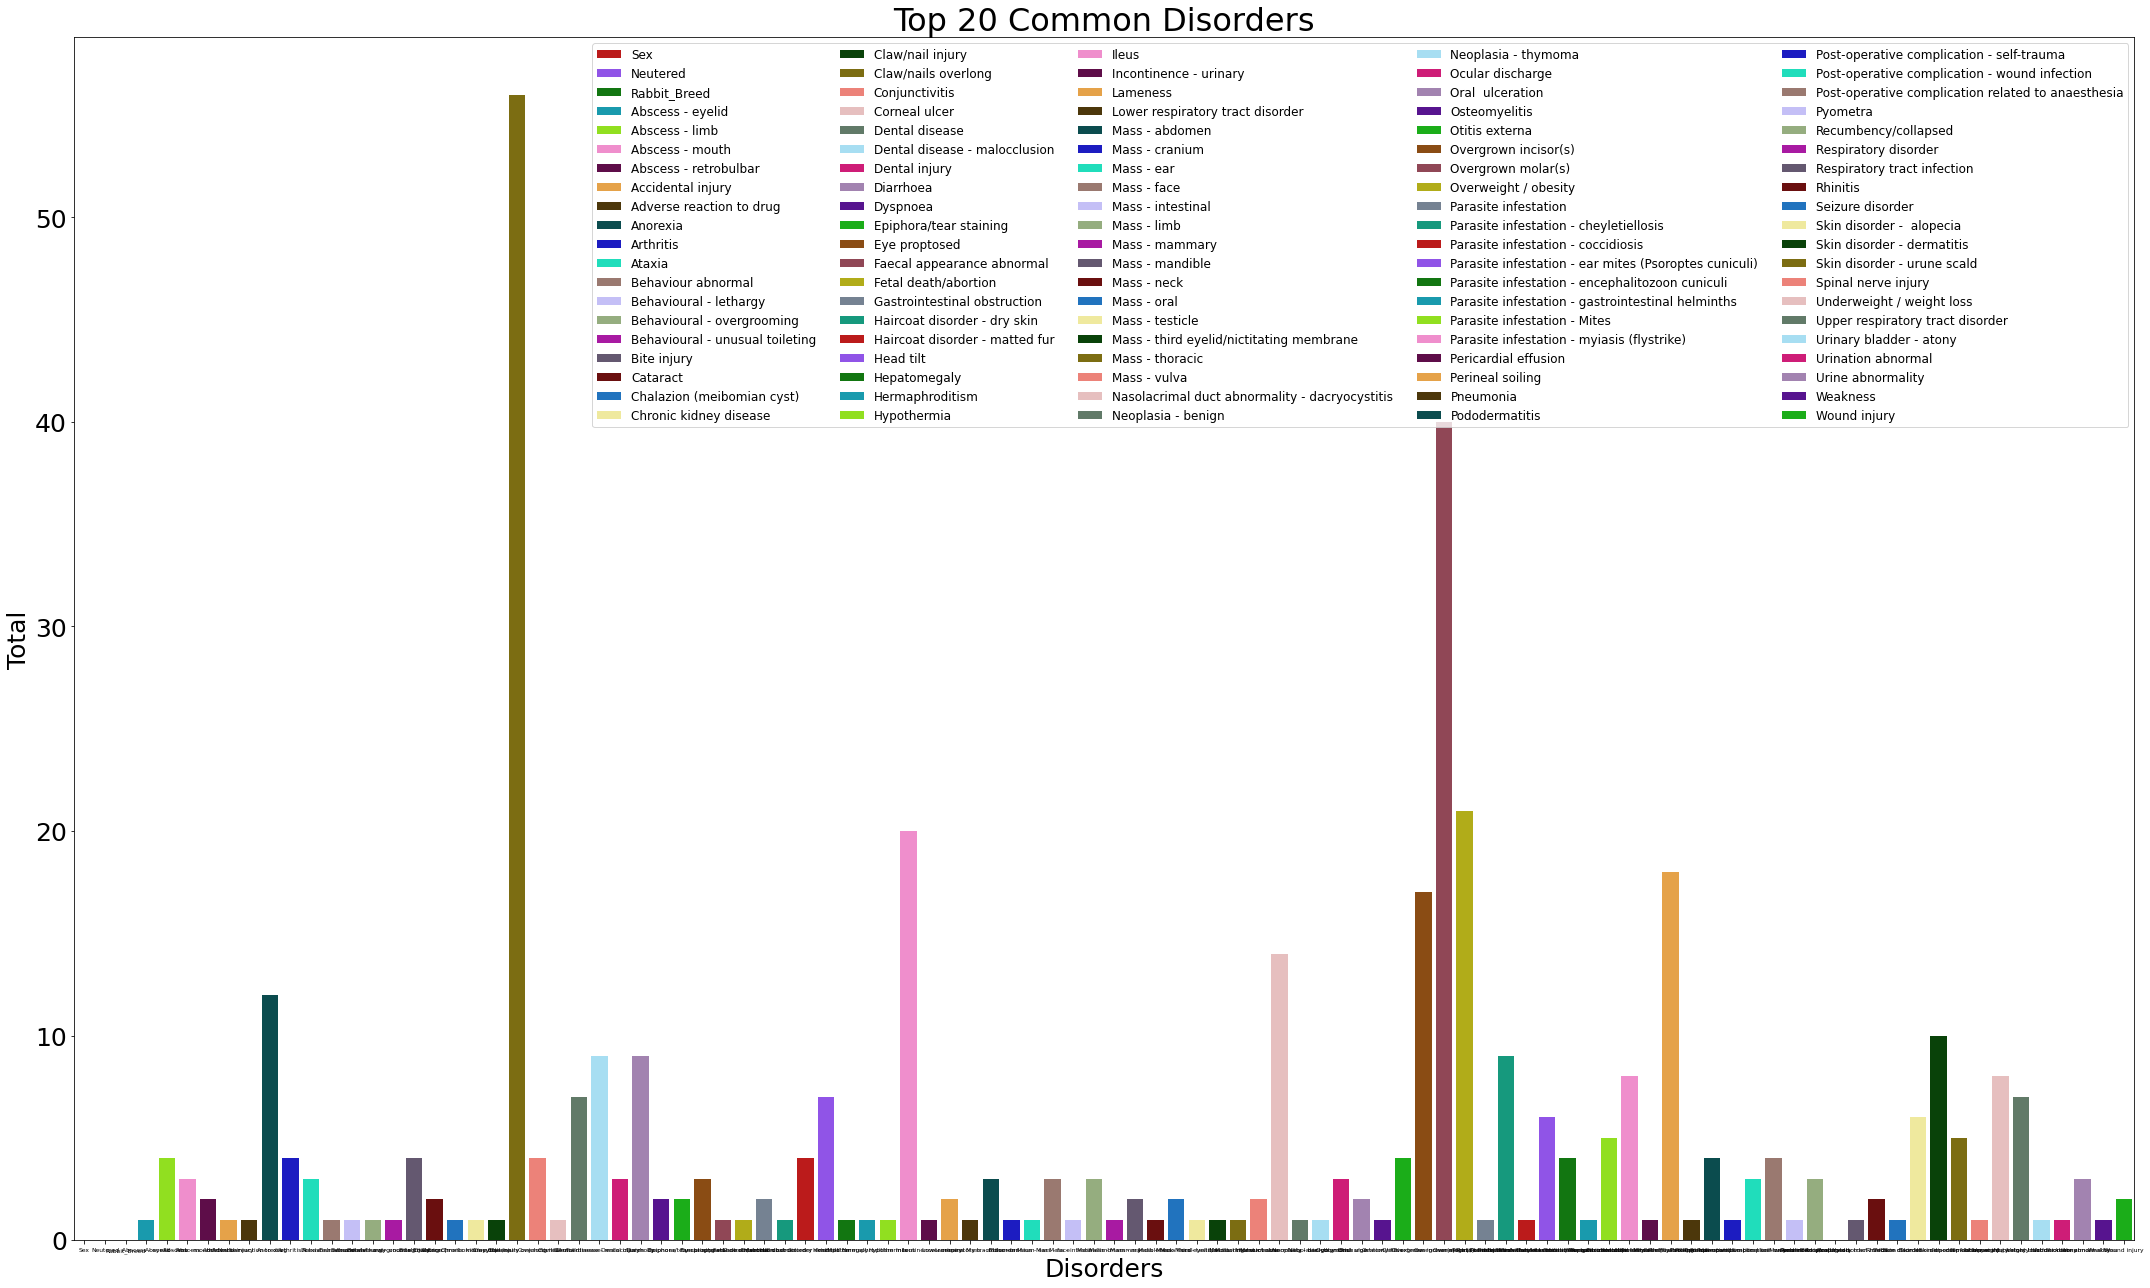

In [64]:
plt.figure(figsize=(30,18))
sns.barplot(data=common_top20, x=df_3['Disorders'], y=df_3['Total'], hue=df_3['Disorders'], dodge=False,palette = sns.color_palette(cc.glasbey, n_colors=35));
plt.xlabel('Disorders', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.title("Top 20 Common Disorders", fontsize=32)
plt.xticks(fontsize=6)
plt.yticks(fontsize=25)
plt.legend(ncol=5, loc=1, fontsize=12)
plt.tight_layout()